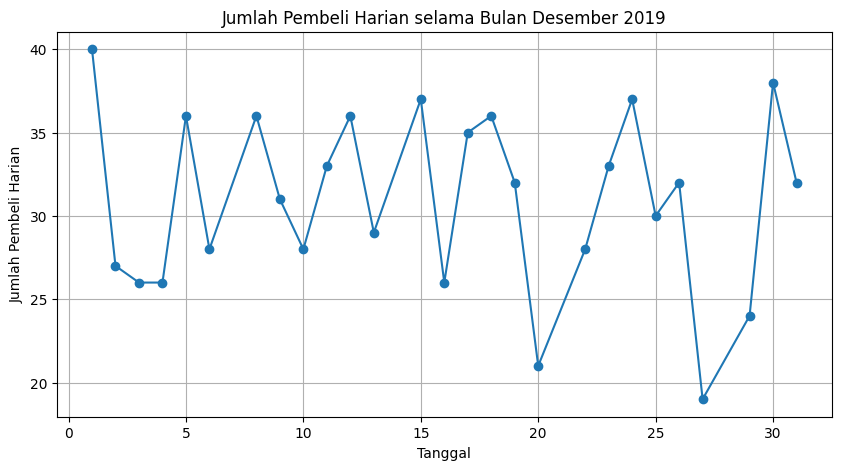

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari URL
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url, parse_dates=['order_date'])

# Mengambil data untuk bulan Desember 2019
df_december = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]

# Menghitung jumlah unique customers di tiap tanggal
daily_customers = df_december.groupby(df_december['order_date'].dt.day)['customer_id'].nunique()

# Membuat line chart
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(daily_customers.index, daily_customers.values, marker='o')

# Mengatur label sumbu-x
ax.set_xlabel('Tanggal')

# Mengatur label sumbu-y
ax.set_ylabel('Jumlah Pembeli Harian')

# Mengatur judul chart
ax.set_title('Jumlah Pembeli Harian selama Bulan Desember 2019')

# Menampilkan grid
ax.grid(True)

# Menampilkan chart
plt.show()


In [2]:
# Menghitung total quantity per brand
brand_quantity = df_december.groupby('brand')['quantity'].sum().reset_index()

# Mengurutkan berdasarkan quantity terjual terbanyak
top5_brands = brand_quantity.nlargest(5, 'quantity')

# Menyimpan data penjualan top 5 brands bulan Desember 2019
dataset_top5brand_dec = df_december[df_december['brand'].isin(top5_brands['brand'])]

# Menampilkan top 5 brands
print("Top 5 brands dengan quantity terjual terbanyak:")
print(top5_brands['brand'].tolist())

Top 5 brands dengan quantity terjual terbanyak:
['BRAND_S', 'BRAND_P', 'BRAND_R', 'BRAND_C', 'BRAND_A']


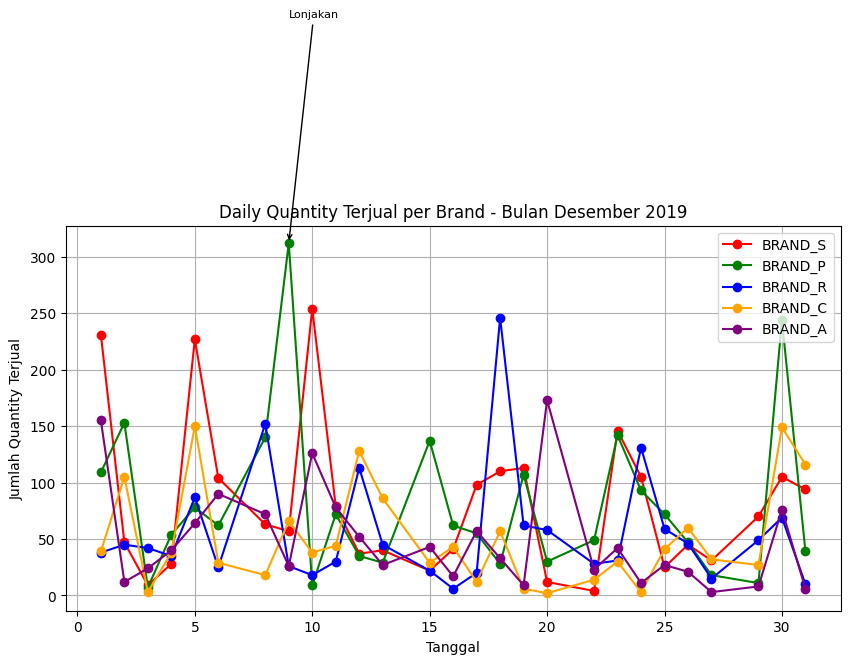

In [3]:
# Mengambil data untuk bulan Desember 2019 dan top 5 brands
df_dec_top5 = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019) & (df['brand'].isin(top5_brands['brand']))]

# Menghitung total quantity per brand dan tanggal
brand_date_quantity = df_dec_top5.groupby(['brand', df_dec_top5['order_date'].dt.day])['quantity'].sum().reset_index()

# Membuat multi-line chart
fig, ax = plt.subplots(figsize=(10, 5))

# Memilih warna untuk setiap brand
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Menampilkan garis untuk setiap brand
for i, brand in enumerate(top5_brands['brand']):
    brand_data = brand_date_quantity[brand_date_quantity['brand'] == brand]
    ax.plot(brand_data['order_date'], brand_data['quantity'], marker='o', label=brand, color=colors[i])

# Mencari tanggal dengan lonjakan quantity
max_quantity_date = brand_date_quantity.loc[brand_date_quantity['quantity'].idxmax()]

# Memberikan anotasi pada titik lonjakan
ax.annotate('Lonjakan', xy=(max_quantity_date['order_date'], max_quantity_date['quantity']),
            xytext=(max_quantity_date['order_date'], max_quantity_date['quantity'] + 200),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=8)

# Mengatur label sumbu-x
ax.set_xlabel('Tanggal')

# Mengatur label sumbu-y
ax.set_ylabel('Jumlah Quantity Terjual')

# Mengatur judul chart
ax.set_title('Daily Quantity Terjual per Brand - Bulan Desember 2019')

# Menampilkan legend
ax.legend()

# Menampilkan grid
ax.grid(True)

# Menampilkan chart
plt.show()

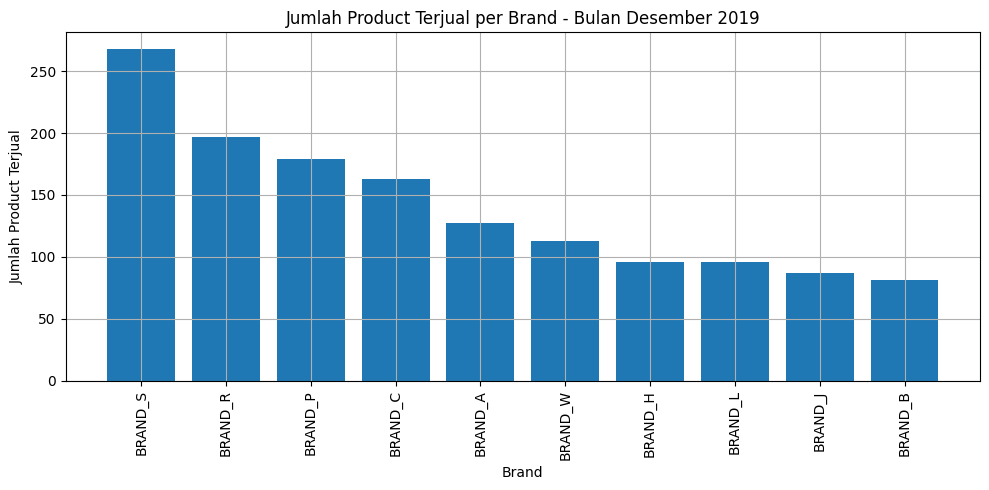

In [4]:
# Mengambil data untuk bulan Desember 2019
df_december = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]

# Menghitung jumlah product terjual per brand
brand_product_count = df_december.groupby('brand')['product_id'].count().reset_index()

# Mengurutkan berdasarkan jumlah product terjual
brand_product_count = brand_product_count.sort_values('product_id', ascending=False)

# Membuat bar chart
fig, ax = plt.subplots(figsize=(10, 5))

# Mengatur posisi x untuk setiap brand
x_pos = range(len(brand_product_count))

# Menampilkan bar untuk setiap brand
ax.bar(x_pos, brand_product_count['product_id'], align='center')

# Mengatur label sumbu-x
ax.set_xlabel('Brand')
ax.set_xticks(x_pos)
ax.set_xticklabels(brand_product_count['brand'], rotation=90)

# Mengatur label sumbu-y
ax.set_ylabel('Jumlah Product Terjual')

# Mengatur judul chart
ax.set_title('Jumlah Product Terjual per Brand - Bulan Desember 2019')

# Menampilkan grid
ax.grid(True)

# Menampilkan chart
plt.tight_layout()
plt.show()

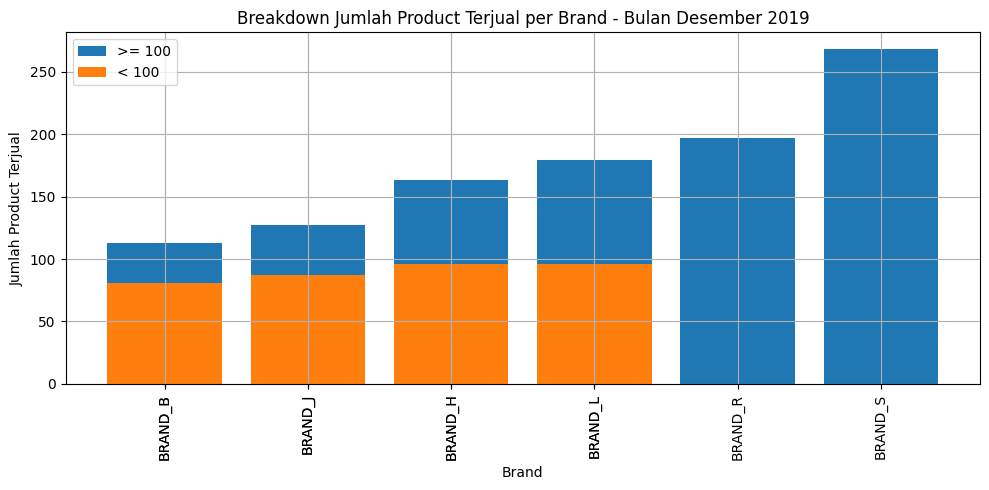

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari URL
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url, parse_dates=['order_date'])

# Mengambil data untuk bulan Desember 2019
df_december = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]

# Menghitung jumlah product terjual per brand
brand_product_count = df_december.groupby('brand')['product_id'].count().reset_index()

# Mengurutkan berdasarkan jumlah product terjual
brand_product_count = brand_product_count.sort_values('product_id')

# Membagi data menjadi dua kelompok: >= 100 dan < 100 product terjual
high_sales = brand_product_count[brand_product_count['product_id'] >= 100]
low_sales = brand_product_count[brand_product_count['product_id'] < 100]

# Membuat stacked chart
fig, ax = plt.subplots(figsize=(10, 5))

# Mengatur posisi x untuk setiap brand
x_pos_high = range(len(high_sales))
x_pos_low = range(len(low_sales))

# Menampilkan bar untuk high sales
ax.bar(x_pos_high, high_sales['product_id'], label='>= 100', align='center')

# Menampilkan bar untuk low sales
ax.bar(x_pos_low, low_sales['product_id'], label='< 100', align='center')

# Menggabungkan posisi x untuk kedua kelompok
x_pos = list(x_pos_high) + list(x_pos_low)

# Mengatur label sumbu-x
ax.set_xlabel('Brand')
ax.set_xticks(x_pos)
ax.set_xticklabels(list(high_sales['brand']) + list(low_sales['brand']), rotation=90)

# Mengatur label sumbu-y
ax.set_ylabel('Jumlah Product Terjual')

# Mengatur judul chart
ax.set_title('Breakdown Jumlah Product Terjual per Brand - Bulan Desember 2019')

# Menampilkan legend
ax.legend()

# Menampilkan grid
ax.grid(True)

# Menampilkan chart
plt.tight_layout()
plt.show()


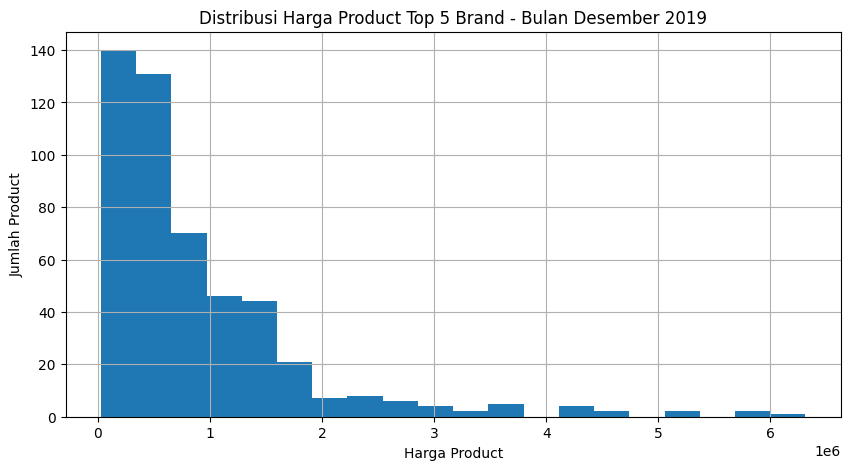

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari URL
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Mengambil data untuk bulan Desember 2019
df_december = df[(df['order_date'].str.contains('2019-12'))]

# Mengambil data hanya untuk top 5 brand
top_5_brands = df_december['brand'].value_counts().head(5).index
df_top_5_brands = df_december[df_december['brand'].isin(top_5_brands)]

# Menghitung median harga untuk tiap product_id
median_prices = df_top_5_brands.groupby('product_id')['item_price'].median()

# Membuat histogram
plt.figure(figsize=(10, 5))
plt.hist(median_prices, bins=20)

# Mengatur label sumbu-x dan sumbu-y
plt.xlabel('Harga Product')
plt.ylabel('Jumlah Product')

# Mengatur judul chart
plt.title('Distribusi Harga Product Top 5 Brand - Bulan Desember 2019')

# Menampilkan grid
plt.grid(True)

# Menampilkan chart
plt.show()


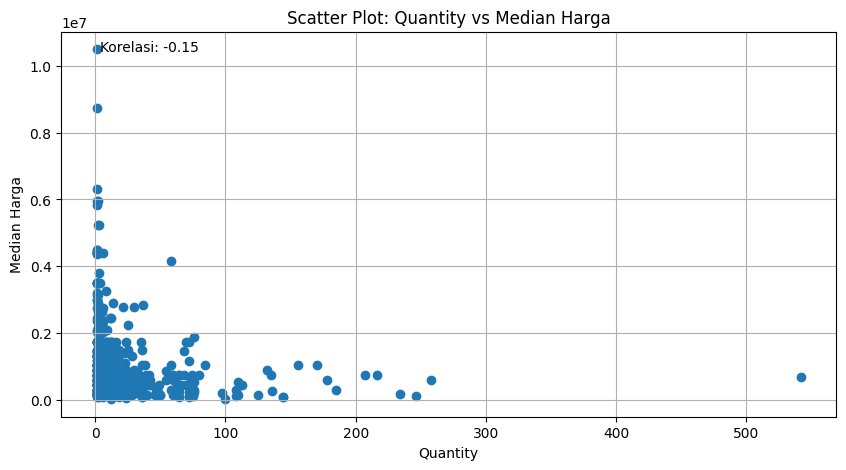

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari URL
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Mengambil data untuk bulan Desember 2019
df_december = df[(df['order_date'].str.contains('2019-12'))]

# Membuat dataframe baru untuk menyimpan median harga dan quantity
df_product_stats = pd.DataFrame()

# Menghitung median harga dan quantity untuk tiap product_id
df_product_stats['median_harga'] = df_december.groupby('product_id')['item_price'].median()
df_product_stats['quantity'] = df_december.groupby('product_id')['quantity'].sum()

# Scatter plot: quantity vs GMV
plt.figure(figsize=(10, 5))
plt.scatter(df_product_stats['quantity'], df_product_stats['median_harga'])
plt.xlabel('Quantity')
plt.ylabel('Median Harga')
plt.title('Scatter Plot: Quantity vs Median Harga')

# Menghitung korelasi antara quantity dan GMV
correlation = df_product_stats['quantity'].corr(df_product_stats['median_harga'])
plt.annotate(f'Korelasi: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')

# Menampilkan grid
plt.grid(True)

# Menampilkan chart
plt.show()


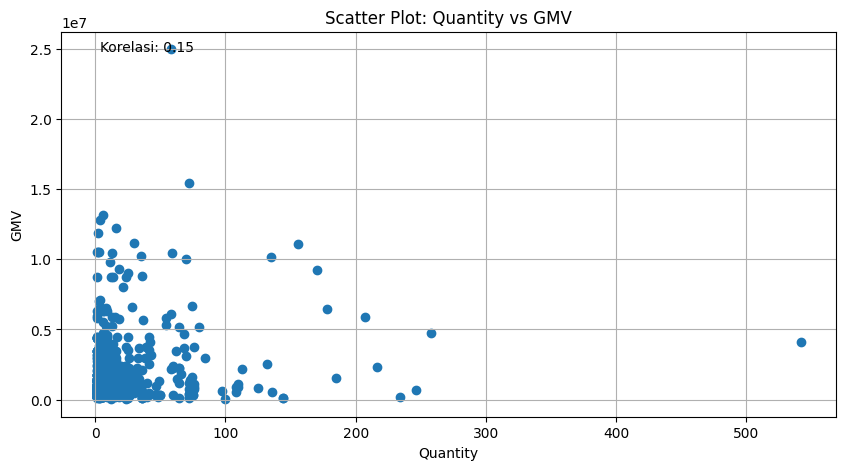

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari URL
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Mengambil data untuk bulan Desember 2019
df_december = df[(df['order_date'].str.contains('2019-12'))]

# Membuat dataframe baru untuk menyimpan median harga, quantity, dan GMV
df_product_stats = pd.DataFrame()

# Menghitung median harga, quantity, dan GMV untuk tiap product_id
df_product_stats['median_harga'] = df_december.groupby('product_id')['item_price'].median()
df_product_stats['quantity'] = df_december.groupby('product_id')['quantity'].sum()
df_product_stats['GMV'] = df_december.groupby('product_id')['item_price'].sum()

# Scatter plot: quantity vs GMV
plt.figure(figsize=(10, 5))
plt.scatter(df_product_stats['quantity'], df_product_stats['GMV'])
plt.xlabel('Quantity')
plt.ylabel('GMV')
plt.title('Scatter Plot: Quantity vs GMV')

# Menghitung korelasi antara quantity dan GMV
correlation = df_product_stats['quantity'].corr(df_product_stats['GMV'])
plt.annotate(f'Korelasi: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')

# Menampilkan grid
plt.grid(True)

# Menampilkan chart
plt.show()
